In [1]:
!pip install chardet

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import chardet

with open('9.x_commit_log.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result)  # 会返回 {'encoding': '编码类型'}

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [25]:
sns.set(style="whitegrid")
df = pd.read_csv('9.x_commit_log.csv', encoding='utf-8',on_bad_lines='skip')

In [19]:
df.head()

,9a0ca119e3,PieterCK,2024-06-27,7ff5040b11,slack-integration: Update Slack integration documentation.
0,7ff5040b11,PieterCK,2024-07-01,ad88fe7005,slack-integration: Block requests from Slack r...
1,ad88fe7005,PieterCK,2024-06-21,0905513841,slack-integration: Add callback function to Sl...
2,0905513841,PieterCK,2024-07-09,148f7cde6c,slack-integration: Add test fixtures for extra...
3,148f7cde6c,PieterCK,2024-08-14,5e3030b072,slack-integration: Update Slack integration to...
4,5e3030b072,Anders Kaseorg,2024-12-11,88fb4279e3,avatar: Fix missing function call. (#32667)


In [26]:
# 将提交日期列转换为 datetime 类型
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有缺失值
df.isnull().sum()

# 删除含有缺失提交日期的行（如果有的话）
df = df.dropna(subset=['commit_date'])

In [27]:
# 强制将 commit_date 转换为 datetime 类型，并处理无效日期（将无效日期设置为 NaT）
df['commit_date'] = pd.to_datetime(df['commit_date'], errors='coerce')

# 检查是否有空值或无效日期，去除这些行
df = df.dropna(subset=['commit_date'])

# 将 commit_date 列转换为 "Period" 类型的月
df['month'] = df['commit_date'].dt.to_period('M')

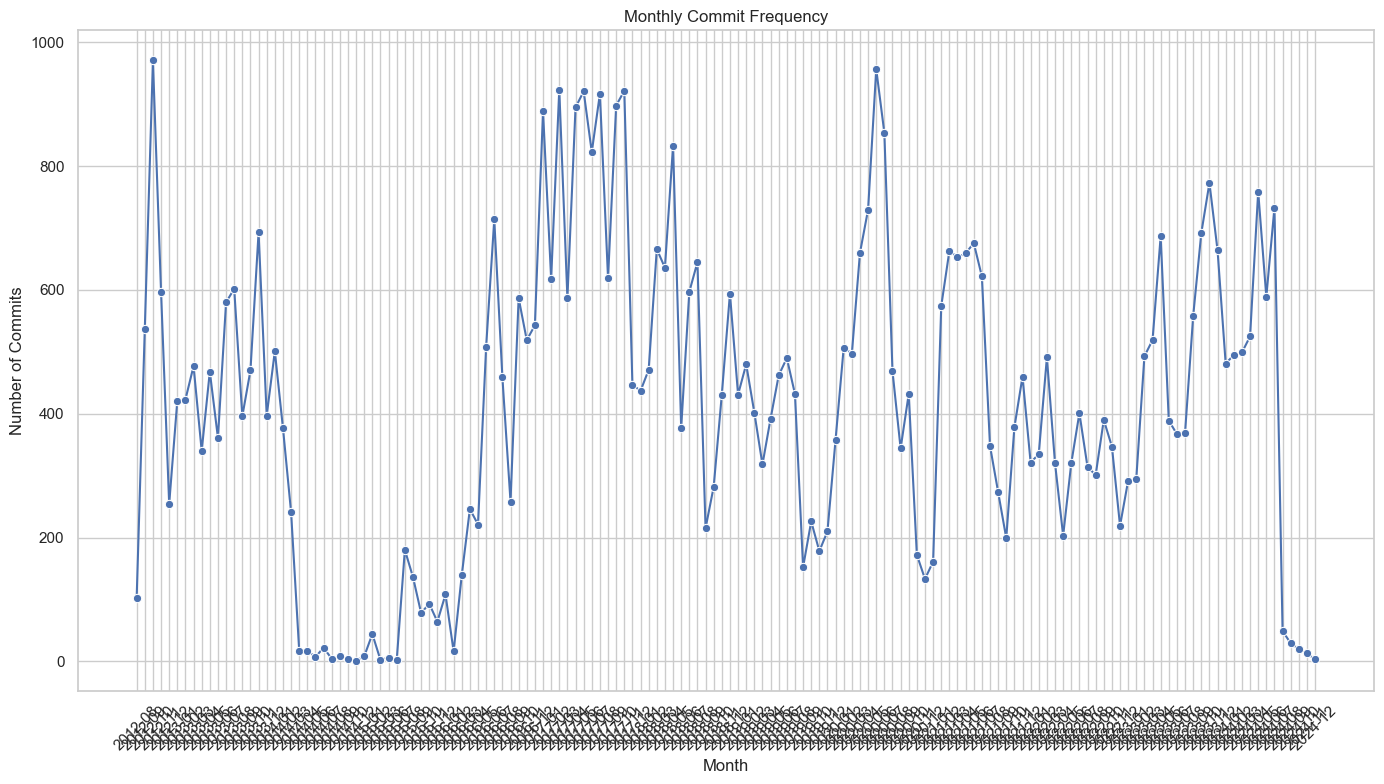

In [28]:
# 转换 'month' 列为字符串类型
df['month_str'] = df['month'].astype(str)

# 按月统计提交次数
monthly_commits = df.groupby('month_str').size().reset_index(name='commit_count')

# 绘制每月提交数量的趋势图
plt.figure(figsize=(14, 8))
sns.lineplot(x='month_str', y='commit_count', data=monthly_commits, marker='o', color='b')
plt.title('Monthly Commit Frequency')
plt.xlabel('Month')
plt.ylabel('Number of Commits')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\17706\AppData\Local\Temp\ipykernel_8616\3061945520.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')


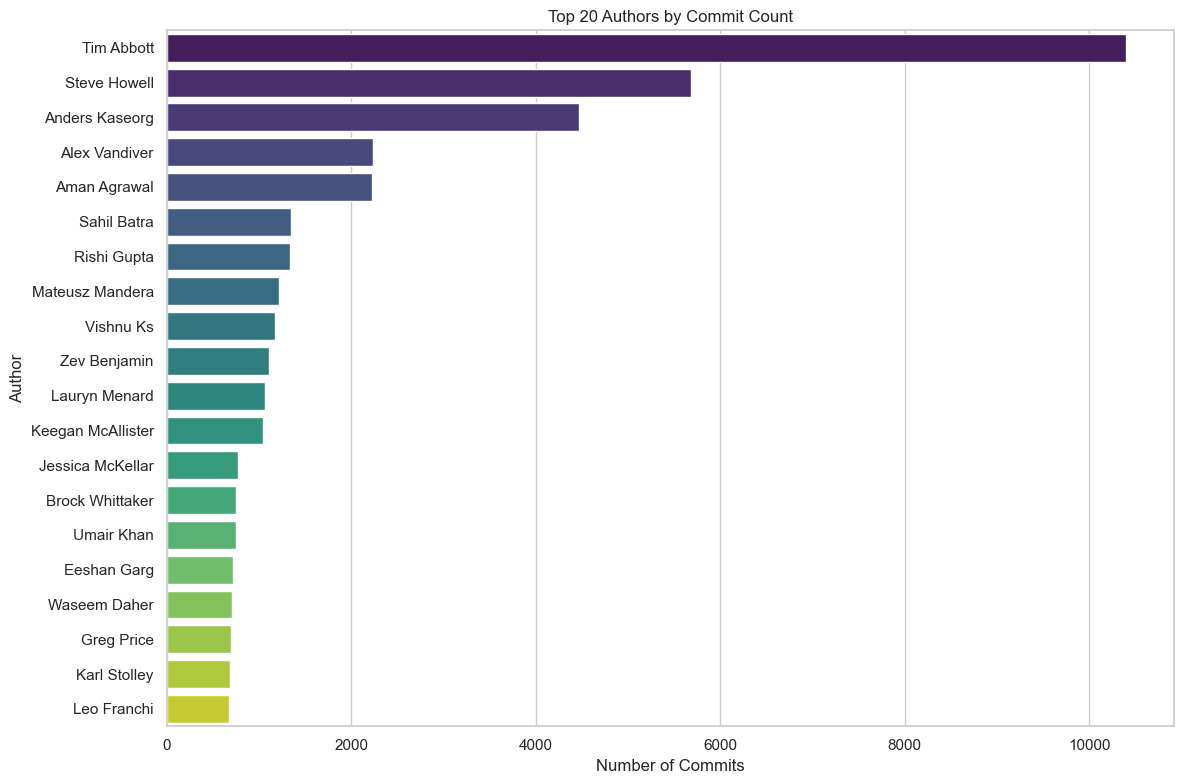

In [34]:
# 按提交者统计提交次数
author_commit_count = df['author'].value_counts().reset_index()
author_commit_count.columns = ['author', 'commit_count']

# 绘制提交者的提交数量柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_commit_count.head(20), palette='viridis')
plt.title('Top 20 Authors by Commit Count')
plt.xlabel('Number of Commits')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\17706\AppData\Local\Temp\ipykernel_8616\2215306937.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')


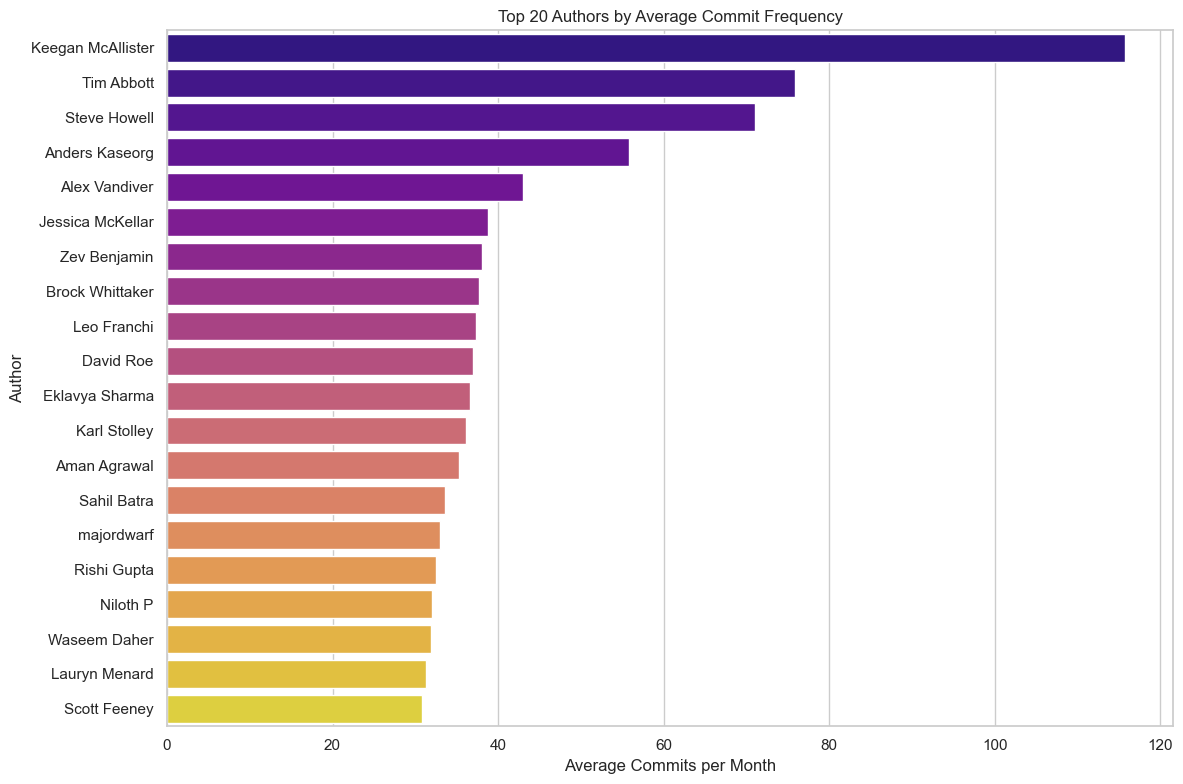

In [35]:
# 计算每位提交者的月度提交数量
df['month'] = df['commit_date'].dt.to_period('M')
author_monthly_commits = df.groupby(['author', 'month']).size().reset_index(name='commit_count')

# 计算每位提交者的平均提交频率
author_avg_commits = author_monthly_commits.groupby('author')['commit_count'].mean().reset_index().sort_values(by='commit_count', ascending=False)

# 绘制每位提交者的平均提交频率柱状图（显示前20名）
plt.figure(figsize=(12, 8))
sns.barplot(x='commit_count', y='author', data=author_avg_commits.head(20), palette='plasma')
plt.title('Top 20 Authors by Average Commit Frequency')
plt.xlabel('Average Commits per Month')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

C:\Users\17706\AppData\Local\Temp\ipykernel_8616\1325465577.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')


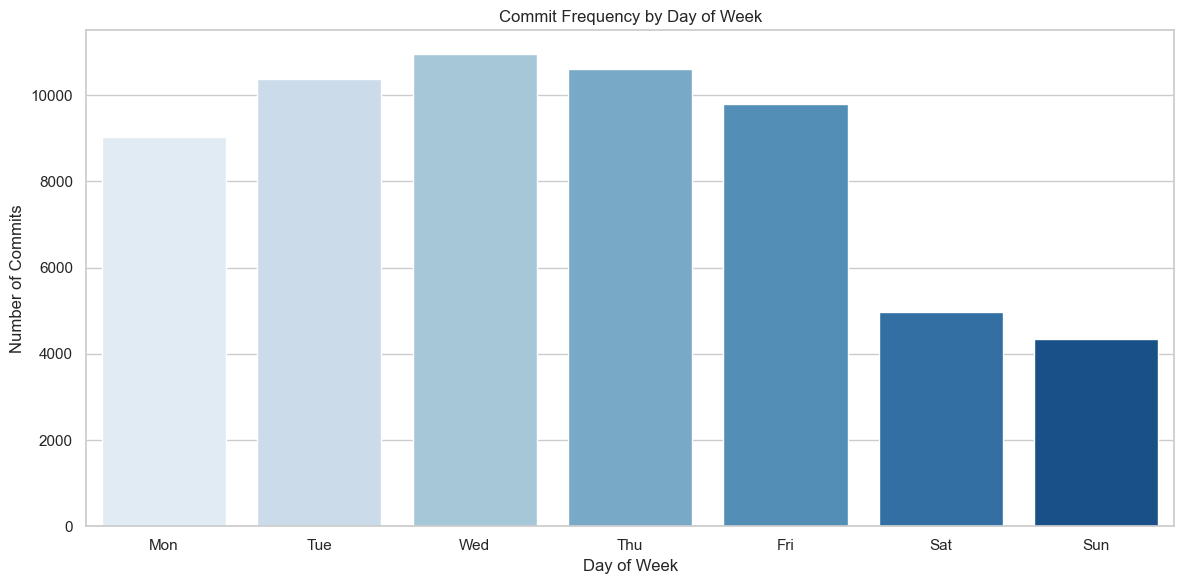

In [36]:
# 提取星期几
df['weekday'] = df['commit_date'].dt.dayofweek

# 按星期几统计提交数量
weekday_commits = df.groupby('weekday').size().reset_index(name='commit_count')

# 绘制按星期几提交数量的柱状图
plt.figure(figsize=(12, 6))
sns.barplot(x='weekday', y='commit_count', data=weekday_commits, palette='Blues')
plt.title('Commit Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Commits')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.tight_layout()
plt.show()

In [37]:
!pip install wordcloud

Looking in indexes: https://mirrors.tuna.tsinghua.edu.cn/pypi/web/simple


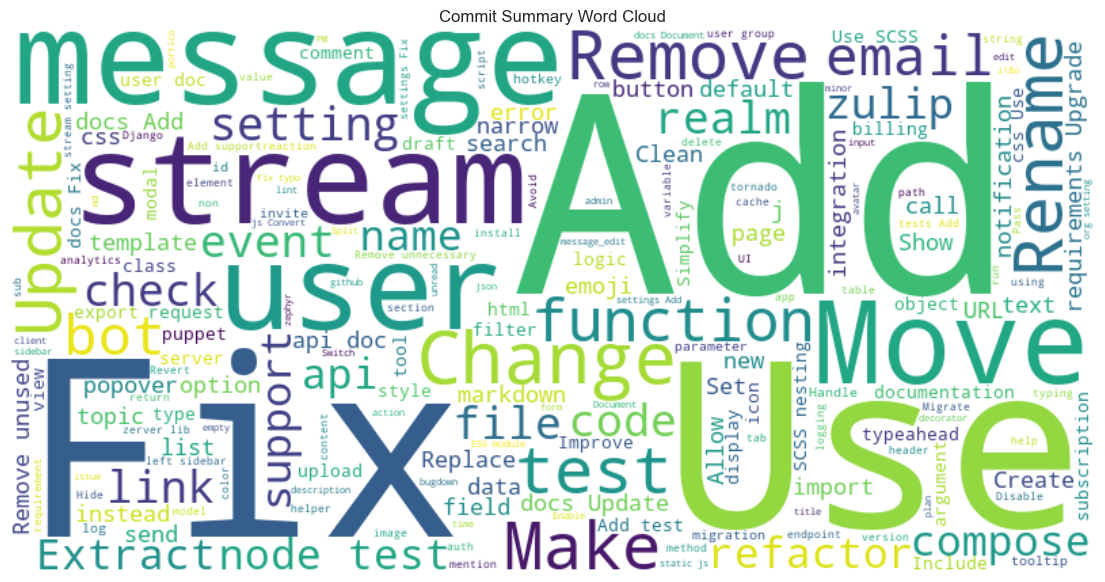

In [38]:
from wordcloud import WordCloud

# 合并所有提交摘要
commit_summary = df['commit_summary'].dropna().str.cat(sep=' ')

# 生成词云
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(commit_summary)

# 显示词云
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Commit Summary Word Cloud')
plt.show()